# **FlowTechLib**
FlowTech is specialized software for simulating liquid/dense gas two-phase flows, such as those found in pre-salt environments. To further enhance result accuracy, FlowTech also simulates liquid/liquid two-phase flows. In both cases, the software uses an advanced combination of mechanistic modeling and artificial intelligence to provide accurate predictions of flow patterns in pipes with inclinations ranging from 0 to 90 degrees. 
Below is a detailed guide on how to install and use the main features of the FlowTechLib library.

# **Installing FlowTechLib with pip**
Before you start using FlowTechLib, you need to install it. Below is a step-by-step guide for the installation process.


## Dependencies Installed or Updated with FlowTechLib

Prerequisites:
- **Python**: Ensure you have Python installed (preferably version 3.6 or higher);

When installing **FlowTechLib**, several libraries will be installed or updated automatically. These include:

- **numpy** >= 1.26.2
- **matplotlib** >= 3.9.0
- **pandas** >= 1.5.1
- **scikit-learn** >= 1.1.3
- **scipy** >= 1.7.3
- **tqdm** >= 4.66.1
- **h5py** >= 3.11.0
- **pytest** >= 7.4.0

These dependencies are necessary to ensure the proper functionality of the library and to provide an optimized simulation experience.

##  Installing via pip
The easiest way to install FlowTechLib is by using **pip**. Run the following command in your terminal or command prompt:

In [1]:
!pip3 install ../.

Defaulting to user installation because normal site-packages is not writeable
Processing /work1/Juniormar/Dropbox/PGD2/FlowTech/GitLab/flowtech
  Preparing metadata (setup.py) ... done
  Created wheel for flowtechlib: filename=flowtechlib-1.0.0-py3-none-any.whl size=382718 sha256=dd31b7e44c9f3559fc8b003e45052cbd27bd9240aacd3262540c5aa0ac55cf15
  Stored in directory: /tmp/pip-ephem-wheel-cache-pc97p8tc/wheels/bd/23/22/57f844ec94ccc28efea4df6904bab1bf057ba86e5820ff984d
Successfully built flowtechlib
  Attempting uninstall: flowtechlib
    Found existing installation: flowtechlib 1.0.0
    Uninstalling flowtechlib-1.0.0:
      Successfully uninstalled flowtechlib-1.0.0


## Verifying the Installation
To verify that the installation was successful, run the following command in the terminal to check the installed version of FlowTechLib:

In [2]:
import importlib_metadata

version = importlib_metadata.version('flowtechlib')
print(version)

1.0.0


If the installation is correct, this will display the installed version of the library.

# **Using the Main Features**
Once the installation is complete, you can start using the FlowTechLib library to simulate liquid/dense-gas and liquid/liquid two-phase flows.
### **Importing FlowTechLib**
At the beginning of your Python script, import the library:

In [3]:
import flowtechlib as ft

## **Parameters: Setting Up Two-Phase Flow Simulations**
**FlowTechLib** allows you to set up simulations for two-phase flows with different inclinations and input conditions. Here’s a basic example of how to set up a liquid/dense-gas flow simulation.

## **Setting up a Liquid/Gas Flow Simulation**:

### Liquid (Fluid 1)
* **Maximum and minimum velocity** $(m/s)$: "vel_max_liq" and "vel_min_liq"
* **Liquid Viscosity** $(Pa\cdot s)$: "visc_liq"
* **Liquid density** $(Kg/m^3)$: "dens_liq"

### **Gas (Fluid 2)**
* **Maximum and minimum velocity** $(m/s)$: "vel_max_gas" and "vel_min_gas"
* **Gas viscosity** $(Pa\cdot s)$: "visc_gas"
* **Gas density** $(Kg/m^3)$: "dens_gas"

### **Interfacial Tension**:
* **Interfacial Tension** $(N/m)$: "inte_tens"

### **Geometry**:
* **Tube diameter** $(m)$: "diam"
* **Tube slope** (degrees - converted to radians): "incl"
* **Mesh resolution** (integer): "resol"

### **Phenomenological models**: "fenomenol"
* "Barnea 1986"
* "Shoham 2005"
* "Trallero 1995"
* Others - In the future!

### **Data-driven models**: "data_driven"
* : "Random Forest"
* : "Gaussian"
* : "KNN"
* : "SVM"
* : "MLPC"
* Others - In the future!

### **You can insert extra points to plot on flow pattern maps**:
* **Gas Velocity List** $(m/s)$: "ext_point_vg"
* **Liquid Velocity List** $(m/s)$: "ext_point_vl"
* **Note 1**: The lists must have the same dimension.
* **Note 2**: For the plotting of results, the additional gas velocities must have values within the range of the minimum and maximum gas velocities. Analogously, the additional liquid velocities must fall within the range of the minimum and maximum liquid velocities.

### **Loading Predefined Parameters**
The FlowTechLib includes predefined parameter examples to facilitate simulations. To begin, load one of the examples:

In [4]:
from flowtechlib import exemples
parms = exemples.exemple_0_Barnea

### **Initializing and Viewing the Parameters**:
After loading the parameters, the next step is to initialize and view the loaded parameters to ensure they are correctly set.

#### **Creating an Instance of the *Patterns* Class**
The Patterns class manages the defined parameters for flow pattern simulations.

In [5]:
import flowtechlib as ft
pat = ft.Patterns(parms)

#### **Viewing the Parameters**
To view the parameter configurations that were loaded, use the **info()** method:


In [6]:
pat.info()


          PROPERTIES     

Fluid 1 (Liquid):
  Name: Water
  Velocity [m/s]: Min = 0.001 / Max = 10.000
  Viscosity [Pa.s]: 0.00114
  Density [kg/m^3]: 999.00

----------------------------------------

Fluid 2 (Gas):
  Name: Air
  Velocity [m/s]: Min = 0.010 / Max = 10.000
  Viscosity [Pa.s]: 0.00002
  Density [kg/m^3]: 1.23

----------------------------------------

Interfacial Tension:
  Sigma [N/m]: 0.07350

----------------------------------------

Pipe Properties:
  Diameter [m]: 0.0510
  Inclination [degrees]: 0.00

----------------------------------------

Models:
  Data Driven Model: Random Forest
  Phenomenological Model: Barnea 1986

----------------------------------------

Simulation Resolution:
  Grid Resolution: 250




### **Phenomenological Flow Pattern Simulation**:
The FlowTechLib allows the generation of flow patterns based on phenomenological models. These models rely on physical theories to predict flow patterns
#### **Initializing the Phenom Class**
Create an instance of the Phenom class to perform the simulation using the phenomenological model:

In [7]:
phe = ft.Phenom(parms)

### **Generating the Phenomenological Flow Pattern Map**
Use the **PhenomPatternsMap()** method to generate the flow pattern map based on the phenomenological model:

In [8]:
phe.PhenomPatternsMap()


Barnea1986 Progress: 100%|██████████| 62500/62500 [00:47<00:00, 1306.49it/s]


Once executed, the pattern will be stored in phe.pattern_map and can be used for visualization.

### **Data-Driven Flow Pattern Simulation**:
In addition to the phenomenological model, **FlowTechLib** provides a data-driven model that uses real data and machine learning to adjust flow patterns.

#### **Initializing the PhenomDataDriven Class**
Create an instance of the **PhenomDataDriven** class to perform the simulation using the data-driven model:

In [9]:
dat = ft.PhenomDataDriven(parms)

### **Generating the Flow Pattern Map with the Data-Driven Model**
To generate the flow pattern map using the data-driven model, use the **PhenomDataDrivenPatternsMap()** method:

In [10]:
dat.PhenomDataDrivenPatternsMap()

### **Data-Driven Flow Pattern Simulation (Hybrid)**:
**FlowTechLib** also allows combining the phenomenological and data-driven models into a hybrid model, which leverages both methods for more accurate predictions.

#### **Initializing the PhenomDataDrivenHybrid Class**
To initialize the hybrid model, which combines the phenomenological pattern with real data, execute:

In [11]:
dat_hyb = ft.PhenomDataDrivenHybrid(parms, phe.pattern_map)

 ### **Generating the Hybrid Flow Pattern Map**
 To generate the flow pattern map using the hybrid model, use the following command:

In [12]:
dat_hyb.PhenomDataDrivenHybridPatternsMap()

### **Visualizing the Results**:
After running the simulations, the flow patterns can be visualized using plots. FlowTechLib allows the direct plotting of results using the **matplotlib** library.
#### Plotting the Phenomenological Flow Pattern Map

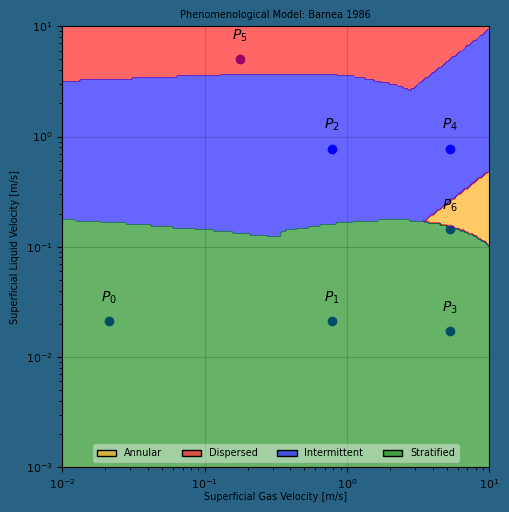

In [13]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
phe.plot_patterns(fig1, ax=ax1, titlefigure=["Phenomenological Model: "],fontsizeleg=7)

#### Plotting the Data-Driven Flow Pattern Map

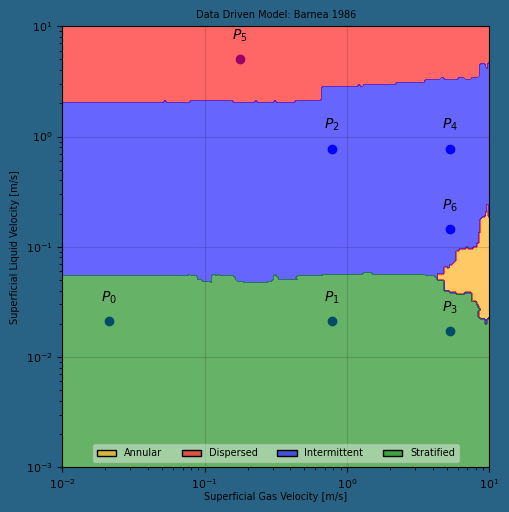

In [14]:
fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))
dat.plot_patterns(fig2, ax=ax2, titlefigure=['Data Driven Model: '],fontsizeleg=7)

#### Plotting the Hybrid Flow Pattern Map

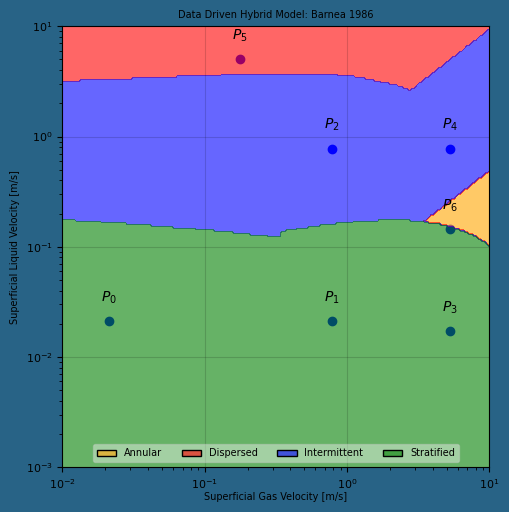

In [15]:
fig3, ax3 = plt.subplots(1, 1, figsize=(5, 5))
dat_hyb.plot_patterns(fig3, ax=ax3, titlefigure=['Data Driven Hybrid Model: '],fontsizeleg=7)
plt.show()

### **Flow Pattern Classification with the Shoham Method**
The second flow pattern classification method in FlowTechLib is based on the model developed by Shoham, which is widely used to predict flow patterns in inclined pipelines. The model takes into account the effect of pipeline inclination on flow patterns and uses mass and momentum balance equations to determine the boundaries between different flow patterns.
#### Complete Example of **Shoham** Classification
Here is a practical example of how to use the classification method based on Shoham:

Shoham2005 Progress: 100%|██████████| 62500/62500 [02:51<00:00, 363.53it/s]


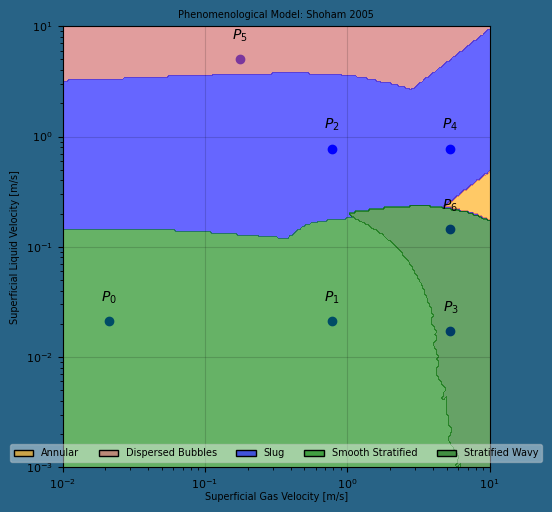

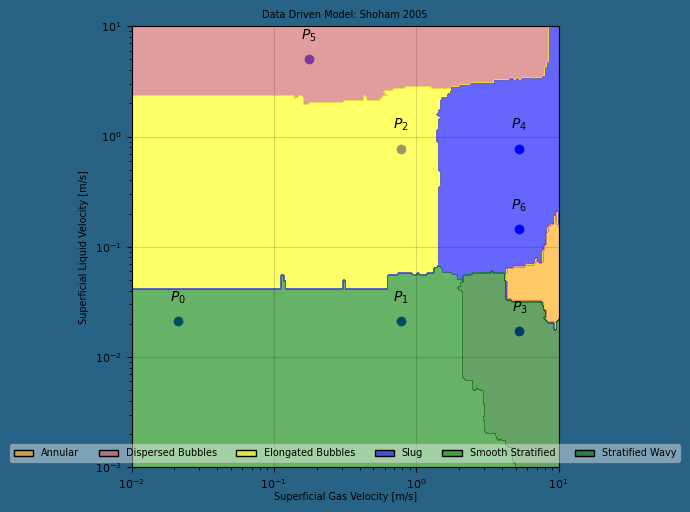

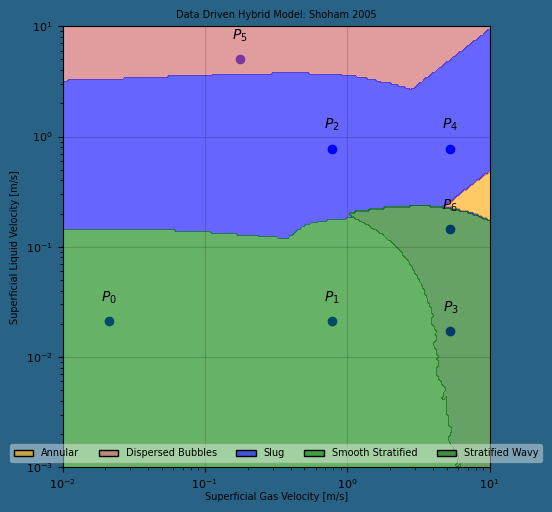

In [16]:
parms = exemples.exemple_0_Shoham
patsho = ft.Patterns(parms)
phesho = ft.Phenom(parms)
phesho.PhenomPatternsMap()
datsho = ft.PhenomDataDriven(parms)
datsho.PhenomDataDrivenPatternsMap()
datsho_hyb = ft.PhenomDataDrivenHybrid(parms, phesho.pattern_map)
datsho_hyb.PhenomDataDrivenHybridPatternsMap()
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
phesho.plot_patterns(fig1, ax=ax1, titlefigure=["Phenomenological Model: "],fontsizeleg=7)
fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))
datsho.plot_patterns(fig2, ax=ax2, titlefigure=['Data Driven Model: '],fontsizeleg=7)
fig3, ax3 = plt.subplots(1, 1, figsize=(5, 5))
datsho_hyb.plot_patterns(fig3, ax=ax3, titlefigure=['Data Driven Hybrid Model: '],fontsizeleg=7)
plt.show()

### **Phenomenological Flow Pattern Classification with the Trellero Model (Liquid/Liquid)**
Below is a complete example of how to use the Trellero phenomenological model in FlowTechLib for liquid/liquid flows:

In [17]:
# parms = exemples.exemple_0_LiqLiq
# liqliq = ft.PhenomLiqLiq(parms)
# liqliq.info()
# liqliq.Trallero1995Map()

# fig1, ax1 = plt.subplots(1, 1, figsize=(6, 6))
# liqliq.plot_patterns(fig1, ax=ax1, titlefigure=["Phenomenological Model: "],fontsizeleg=7)
# plt.show()

## **HoldUp and Pressure (Searching for calculation or programming errors)**
The parameters are basically the same as those used in the case of the flow pattern, with the only differences being the surface velocities, which in this case are single values instead of intervals (minimum and maximum), and the absence of resolution selection, as the results are also single values and not meshes (maps).

In [18]:
# parms2 = exemples.exemple_1_Barnea

To calculate Pressure Gradient and Holdup with the models defined in the parameters, it is necessary to first create an instance of the 'HoldUp' class, and before that, the 'Patterns' instance must be recreated with the parameters, by executing:

In [19]:
# pat = Patterns(parms2)
# hu = HoldUp(parms2)

In [20]:
# hu_dat = HoldUpDataDriven(parms2)

In [21]:
# hu_dat.GradientBoosting()

In [22]:
# hu_dat_hyb = HoldUpDataDrivenHybrid(parms2)

In [23]:
# phe2 = Phenom(parms)
# for ii,v in enumerate(phe2.ext_point_vg):
#     a = phe2.Barnea1986_function_point(phe2.ext_point_vl[ii], phe2.ext_point_vg[ii])
#     print(f'P_{ii} = ({phe2.ext_point_vg[ii]}, {phe2.ext_point_vl[ii]})')
#     print(f'Phenomenological Flow Pattern: {a}')
#     b,c = hu.PhenomPressureHoldUp(phe2.ext_point_vl[ii], phe2.ext_point_vg[ii])
#     print(15*'-')
#     print(f'HoldUp and Pressure: Phenomenological Model: {pat.fenomenol}')
#     print(15*'-')
#     print(f'dp_dx_F = {-b}, frac_l_F = {c}',)
#     print(15*'-')
#     print(f'HoldUp and Pressure: Data-Driven Model: {pat.data_driven}')
#     print(15*'-')
#     print(f'dp_dx_D = {hu_dat.dpdx[ii]}, frac_l_D = {hu_dat.holdup[ii]}')
#     print(15*'-')
#     print(f'HoldUp and Pressure: Data-Driven Hybrid model: {pat.fenomenol} and {pat.data_driven}')
#     print(15*'-')
#     print(f'dp_dx_H = {hu_dat_hyb.dpdx[ii]}, frac_l_H = {hu_dat_hyb.holdup[ii]}')
#     print(35*'*#')